In [1]:
#Import modules

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create URL Link

finviz_url = 'https://finviz.com/quote.ashx?t='

In [3]:
# Create list of tickers

tickers = ['META','GOOG','MSFT']

In [4]:
# Create dataframe of parsed data

news_tables={}

for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)   
    html = BeautifulSoup(response, 'html')
    news_table=html.find(id='news-table')
    news_tables[ticker] = news_table
    
    
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.find_all('tr'):
        
        title = row.a.text
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
            
        parsed_data.append([ticker, date, time, title])
        
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])                                  

In [5]:
# Instantiate Vader Sentiment Analyzer then run and append result to the dataframe

vader = SentimentIntensityAnalyzer()

f= lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df.head()

,ticker,date,time,title,compound
0,META,Jul-23-22,12:16PM,Is it a Great Move to Acquire Meta (FB) Shares?,0.7430
1,META,Jul-23-22,12:13PM,Fundsmith Equity on Meta (FB): Its Either Chea...,0.0258
2,META,Jul-23-22,05:30AM,"Hong Kong gets its first metaverse churches, c...",0.0000
3,META,Jul-22-22,04:36PM,"Stocks Drop, Ending Three-Day Rally",-0.2732
4,META,Jul-22-22,04:29PM,Progressive Caucus Asks Schumer to Set Vote on...,0.0000


In [6]:
# Convert to datetime format for plotting

df['date']=pd.to_datetime(df.date).dt.date
df


,ticker,date,time,title,compound
0,META,2022-07-23,12:16PM,Is it a Great Move to Acquire Meta (FB) Shares?,0.7430
1,META,2022-07-23,12:13PM,Fundsmith Equity on Meta (FB): Its Either Chea...,0.0258
2,META,2022-07-23,05:30AM,"Hong Kong gets its first metaverse churches, c...",0.0000
3,META,2022-07-22,04:36PM,"Stocks Drop, Ending Three-Day Rally",-0.2732
4,META,2022-07-22,04:29PM,Progressive Caucus Asks Schumer to Set Vote on...,0.0000
...,...,...,...,...,...
295,MSFT,2022-07-18,04:25PM,Is Salesforce A Buy Or Sell As Software Growth...,0.0772
296,MSFT,2022-07-18,04:06PM,PC Sales Weakness To Weigh On Microsoft's June...,-0.4215
297,MSFT,2022-07-18,02:16PM,"Apple to Slow Hiring as Economy Softens, Repor...",0.0000
298,MSFT,2022-07-18,12:13PM,A Comprehensive Guide to Video-Gaming ETFs,0.2500


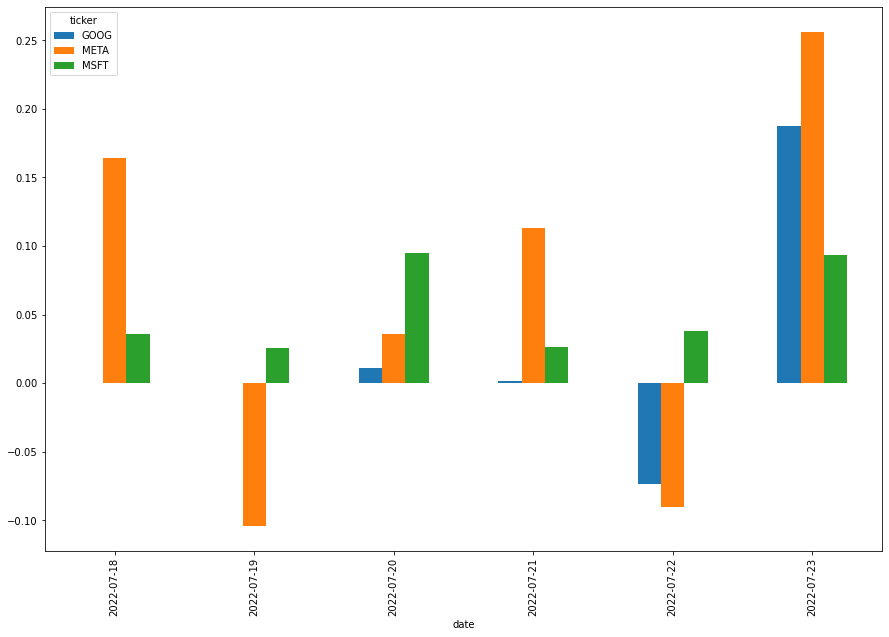

In [7]:
# Group data by ticker and date and then, plot bar chart

mean_df = df.groupby(['ticker','date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis='columns').transpose()
mean_df.plot(kind='bar', figsize=(15,10))
plt.show()